In [159]:
import pandas as pd
import nltk
import numpy as np
import logging
from numpy import random
import gensim
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

In [160]:
df = pd.read_csv('train_data_live.csv')
df.head()

,URL,Abstract,Category
0,/[i9https://patents.google.com/patent/US904030...,\n Methods and compositions for targeted d...,Non-Alcohol
1,https://patents.google.com/patent/US9040109B2/en,\n The present invention provides stabiliz...,Non-Alcohol
2,https://patents.google.com/patent/US9040107B2/en,\n A dairy-based yogurt product having a p...,Non-Alcohol
3,https://patents.google.com/patent/US9040036B2/en,\n The present invention relates to pharma...,Non-Alcohol
4,https://patents.google.com/patent/US9038991B2/en,\n A carbonator tank assembly is disclosed...,Non-Alcohol


In [161]:
df.shape

(1200, 3)

In [162]:
df[df['Category'].isnull()]

,URL,Abstract,Category
130,https://patents.google.com/patent/EP2731451A4/en,Non-Alcohol,NaN
131,https://patents.google.com/patent/EP2407170B1/en,Non-Alcohol,NaN
132,https://patents.google.com/patent/EP2423290A4/en,Non-Alcohol,NaN
134,https://patents.google.com/patent/EP2374382B1/en,Non-Alcohol,NaN
136,https://patents.google.com/patent/EP2355667B1/en,Non-Alcohol,NaN
...,...,...,...
1099,https://patents.google.com/patent/EP2930580B1/en,Autonomous Vehicles,NaN
1101,https://patents.google.com/patent/EP2628062A4/en,Autonomous Vehicles,NaN
1108,https://patents.google.com/patent/EP2981445A4/en,Autonomous Vehicles,NaN
1198,https://patents.google.com/patent/EP2544928B1/en,Autonomous Vehicles,NaN


In [163]:
df.dropna(inplace=True)
df.head()

,URL,Abstract,Category
0,/[i9https://patents.google.com/patent/US904030...,\n Methods and compositions for targeted d...,Non-Alcohol
1,https://patents.google.com/patent/US9040109B2/en,\n The present invention provides stabiliz...,Non-Alcohol
2,https://patents.google.com/patent/US9040107B2/en,\n A dairy-based yogurt product having a p...,Non-Alcohol
3,https://patents.google.com/patent/US9040036B2/en,\n The present invention relates to pharma...,Non-Alcohol
4,https://patents.google.com/patent/US9038991B2/en,\n A carbonator tank assembly is disclosed...,Non-Alcohol


In [164]:
df.shape

(1056, 3)

In [165]:
# tokenizing and stemming training abstract
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# stop words dictionary
stop_words = set(stopwords.words("english"))
stop_words.add(',')
stop_words.add('.')
stop_words.add(';')
stop_words.add(':')
stop_words.add('(')
stop_words.add(')')
stop_words.add('-')
# stop_words.add(';')


ps = PorterStemmer()

for i in range(len(df)):
    example_text = df.iloc[i,1]
    words = word_tokenize(example_text)
    filtered_sentence = []
    for w in words:
        w = w.lower()
        w = ps.stem(w)
        if w not in stop_words:
            filtered_sentence.append(w)
    df.iloc[i,1] = filtered_sentence
    print(i) # counter

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [166]:
df.head()

,URL,Abstract,Category
0,/[i9https://patents.google.com/patent/US904030...,"[method, composit, target, deliveri, biotherap...",Non-Alcohol
1,https://patents.google.com/patent/US9040109B2/en,"[present, invent, provid, stabil, oil-in-wat, ...",Non-Alcohol
2,https://patents.google.com/patent/US9040107B2/en,"[dairy-bas, yogurt, product, protein, level, a...",Non-Alcohol
3,https://patents.google.com/patent/US9040036B2/en,"[present, invent, relat, pharmaceut, composit,...",Non-Alcohol
4,https://patents.google.com/patent/US9038991B2/en,"[carbon, tank, assembl, disclos, use, beverag,...",Non-Alcohol


Alcohol                    297
Autonomous Vehicles        291
Non-Alcohol                247
Non-Autonomous Vehicles    221
Name: Category, dtype: int64


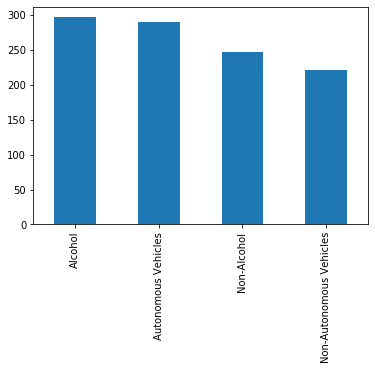

In [167]:
print(df.Category.value_counts())
df.Category.value_counts().plot(kind='bar')
plt.savefig("data.jpg",dpi=300)

In [168]:
for i in range(len(df)):
    l = ''
    for j in df.iloc[i,1]:
        print(j)
        l+=j
        l+=' '
    df.iloc[i,1] = l   
df.head()
# df

method
composit
target
deliveri
biotherapeut
provid
composit
compris
bile-sensit
st.
thermophilu
bacteria
modifi
releas
biotherapeut
agent
follow
bile
exposur
biotherapeut
agent
releas
st.
thermophilu
bacteria
disclos
herein
includ
aq
aqr
rich
peptid
method
invent
compris
administ
subject
st.
thermophilu
bacterium
modifi
releas
biotherapeut
agent
follow
bile
exposur
administr
st.
thermophilu
bacterium
promot
desir
therapeut
respons
bacterium
may
modifi
express
releas
aq
aqr
rich
peptid
subsequ
inhibit
cellular
apoptosi
reduc
mucos
damag
thu
method
invent
find
use
treat
prevent
varieti
gastrointestin
disord
includ
c.
difficil
infect
antibiotic-associ
diarrhea
present
invent
provid
stabil
oil-in-wat
emuls
extend
rang
chemic
thermal
and/or
mechan
stabil
method
prepar
prepar
provid
environmentally-protect
biopolym
compon
exhibit
improv
adher
dispers
phase
reduc
elimin
dissoci
therefrom
condit
use
context
rang
food
pharmaceut
person
care
health
care
cosmet
end-us
applic
dairy-bas
yogurt
pro

system
gener
brew
beverag
may
receiv
request
produc
specifi
brew
beverag
system
may
includ
schedul
initi
control
perform
one
chemic
mechan
process
produc
beverag
one
chemic
mechan
process
produc
beverag
perform
process
may
perform
product
beverag
anoth
beverag
schedul
may
determin
time
perform
process
time
beverag
present
resourc
use
perform
process
time
perform
clean
process
depend
actual
expect
demand
beverag
depend
target
time
beverag
retriev
share
resourc
may
appli
product
beverag
high
prioriti
order
partial
complet
beverag
lower
prioriti
order
stage
subsequ
advanc
energi
composit
includ
methyl
xanthin
cholin
deriv
least
one
flavor
suffici
amount
render
energi
composit
palat
energi
composit
may
also
includ
vitamin
amino
acid
enzym
preserv
like
protein
rehydration/recoveri
beverag
composit
provid
includ
aqueou
compon
water
hydrolyz
protein
sodium
acid
sulfat
least
one
edibl
acid
hydrolyz
protein
may
hydrolyz
whey
option
hydrolyz
collagen
addit
beverag
composit
may
includ
least
one
c

stream
macro-ingredi
water
combin
stream
juic
extractor
temperatur
display
function
includ
bodi
temperatur
display
devic
bodi
includ
base
contain
cover
mount
top
end
contain
temperatur
display
devic
mount
bodi
includ
temperatur
detect
portion
display
temperatur
detect
portion
connect
display
via
signal
transmiss
rout
temperatur
chang
contain
dure
oper
bodi
known
temperatur
display
devic
dispens
apparatu
hot
beverag
provid
devic
4,5
filter
hot
pressur
water
ground
edibl
ingredi
coffe
tea
herbal
remedi
chamber
control
unit
16
store
data
two
piston
oper
independ
two
motor
control
volum
and/or
posit
brew
chamber
chroman
deriv
intermedi
compound
composit
contain
method
prepar
use
thereof
therapeut
agent
particularli
anti-canc
chemotherapeut
select
agent
describ
provid
process
prevent
and/or
reduct
acrylamid
format
and/or
acrylamid
precursor
format
foodstuff
contain
protein
peptid
amino
acid
ii
reduc
sugar
process
compris
contact
foodstuff
enzym
capabl
oxid
reduc
group
sugar
thi
invent
gener

particul
inclus
ad
core
materi
mixtur
hybrid
complex
coacerv
deposit
coat
layer
around
core
materi
capsul
form
anoth
embodi
invent
young
anim
calv
may
fed
milk
replac
contain
soy
preserv
treatment
acid-produc
bacteria
reduc
ph
milk
replac
microbi
digest
sugar
present
soy
therebi
produc
ferment
milk
replac
milk
replac
edibl
least
48
hour
digest
young
anim
increas
due
microbi
digest
sugar
soy
otherwis
indigest
gut
young
anim
ferment
milk
replac
may
ingest
young
anim
group
set
addit
milk
replac
contain
soy
may
treat
enzym
adapt
hydrolyz
complex
indigest
carbohydr
within
milk
replac
potassium
sorbat
feed
system
incorpor
ferment
milk
replac
may
result
increas
gain
increas
dri
matter
intak
without
neg
affect
anim
health
present
invent
relat
bacteri
cell
textur
properti
starter
cultur
compris
cell
dairi
product
ferment
starter
cultur
method
produc
beverag
product
mapl
sap
sugar
content
mapl
sap
modifi
predetermin
level
result
beverag
subject
high
pressur
order
sanit
beverag
without
foul
tast


coupl
protrus
form
upper
part
rotari
brush
screw
coupl
protrus
rotari
brush
coupl
groov
coupl
screw
coupl
groov
rotari
brush
coupl
protrus
coupl
manner
rotari
brush
directli
rotat
screw
dure
rotat
screw
therebi
reduc
failur
rate
caus
damag
wear
compon
gear
like
provid
simpl
easi
assembl
oper
present
invent
relat
gener
field
colour
composit
one
aspect
invent
red
composit
compris
quinc
juic
wherein
quinc
juic
impart
red
colour
composit
wherein
sugar
acid
ad
invent
provid
use
red
composit
compris
quinc
juic
colour
food
product
nutrit
formul
food
supplement
beverag
ink
pharmaceut
product
aspect
invent
method
prepar
red
composit
compris
quinc
juic
present
invent
relat
mastic
separ
separ
fruit
veget
juic
fruit
veget
pulp
mastic
separ
compris
hous
21
inner
wall
43
hous
21
auger
22,71
rotat
mount
hous
21
caviti
46
defin
outer
surfac
39,86
auger
22,71
inner
wall
43
receiv
pulp
juic
juic
passageway
44
separ
caviti
46
elong
apertur
52
form
inner
wall
43
extend
caviti
46
juic
passageway
44
therefo

coat
shell
egg
improv
strength
shatter
resist
process
egg
coat
includ
food
grade
natur
resin
shellac
mixtur
paraffin
beeswax
food
grade
polym
emuls
polyvinyl
acet
coat
ha
thick
suffici
increas
energi
requir
crush
shell
egg
compar
similar
shell
egg
coat
addit
coat
ha
thick
suffici
prevent
shell
egg
shatter
crack
open
coat
thick
inher
strength
contribut
improv
shell
strength
present
invent
relat
artifici
carbon
beverag
contain
foam
control
agent
and/or
carbon
dioxid
control
agent
control
agent
compris
polyglycerol
fatti
acid
ester
seal
contain
contain
beverag
concentr
beverag
method
make
beverag
method
reduc
foam
and/or
improv
retent
carbon
dioxid
beverag
also
describ
juicer
interchang
modul
citru
juicer
modul
slow
juic
modul
allow
conveni
use
differ
juicer
modul
singl
base
unit
base
hous
motor
protrud
drive
shaft
arm
protrud
side
base
hook
end
hold
modul
abov
arm
freed
pivot
snap
notch
fix
upward
posit
hold
modul
snap
notch
citru
juicer
modul
ha
pitcher-lik
juic
collector
strainer
citru

present
invent
relat
juicer
capabl
adjust
amount
pulp
juicer
capabl
adjust
amount
pulp
contain
juic
extract
vertic
movement
screw
assembl
juicer
compris
hollow
drum
cover
arrang
upper
part
drum
screw
assembl
mount
insid
drum
allow
rotat
therein
wherein
amount
pulp
contain
juic
extract
adjust
vertic
movement
screw
assembl
composit
method
treatment
non-alcohol
steatohepat
relat
disord
provid
herein
exampl
women
50
pre-menopaus
women
provid
anti-fatigu
composit
result
combin
use
1
histidin
2
vitamin
b6
and/or
carnosin
food
like
contain
1
histidin
2
vitamin
b6
and/or
carnosin
form
packag
per-meal
unit
present
invent
composit
food
like
contain
histidin
convent
non-exist
composit
and/or
form
effect
amelior
caus
recoveri
fatigu
low
risk
side
effect
thi
method
produc
crosslink
product
carboxymethyl-group-contain
modifi
hyaluron
acid
includ
step
keep
solut
compris
carboxymethyl-group-contain
modifi
hyaluron
acid
and/or
salt
thereof
-200°c
10°c
inclus
product
method
carboxymethyl-group-contain
m

row
protrus
4
two
impel
2
altern
wherein
channel
form
protrus
4
counter-rot
impel
2
adapt
subject
least
one
stream
space
centrifug
forc
creat
shear
flow
mix
and/or
homogen
least
one
stream
insid
channel
slow
type
fruit
veget
juic
rotat
augur
provid
feed
tube
safeti
featur
arrang
array
upper
edg
invent
relat
method
devic
provid
composit
contain
hyaluron
acid
particular
cosmet
medic
purpos
invent
suggest
hyaluron
acid
store
dose-met
devic
10
potabl
water
potabl
water
network
20
mix
hyaluron
acid
use
dose-met
devic
10
composit
form
present
invent
relat
character
chang
mammalian
microbiota
associ
antibiot
treatment
variou
immunolog
condit
relat
therapeut
method
therapeut
method
invent
involv
use
probiot
prebiot
synbiot
antibiot
disclos
herein
nutrit
composit
least
one
protein
least
one
fat
least
one
lipophil
compound
composit
compris
least
one
assembl
compris
least
one
hydrophob
protein
monoglycerid
diglycerid
``
mdg
''
least
one
lipophil
compound
wherein
least
1
%
total
mdg
nutrit
composi

apparatu
prevent
format
beer
stone
gas-induc
phenomenon
foami
beer
spurt
draught
beer
contain
dispos
pipe
draught
beer
contain
draught
beer
dispens
apparatu
prevent
gas-induc
phenomenon
occur
beer
discharg
draught
beer
contain
draught
beer
dispens
apparatu
remov
prevent
format
beer
stone
deposit
inner
surfac
pipe
draught
beer
contain
draught
beer
dispens
apparatu
inner
surfac
draught
beer
dispens
apparatu
method
disclos
reduc
oil
water
emuls
coke
process
one
exemplari
method
compris
provid
aqueou
stream
oil
water
emuls
provid
treatment
composit
wherein
treatment
composit
compris
least
one
cation
polyacrylamid
contact
aqueou
stream
treatment
composit
present
invent
disclosur
reveal
easili
chang
beer
font
wine
bottl
growler
cork
system
compris
easili
chang
standard
facepl
use
quick
identif
font
bodi
affix
industri
standard
beer
tap
cork
slide
mechan
allow
quick
chang
identifi
facepl
magnet
pair
mount
facepl
font
bodi
assist
assembl
's
rigid
secur
electrocatalyt
composit
thi
invent
compri

free
radic
polymer
initi
wherein
crosslink
agent
present
amount
0.1
wt
%
5.0
wt
%
base
weight
vinylpyrrolidon
also
disclos
method
drill
complet
oper
subterranean
format
method
reduc
viscos
brew
process
compris
step
prepar
mash
malt
adjunct
b
ad
arabinofuranosidas
gh43
mash
invent
relat
method
control
applic
liquid
materi
web
1
particular
applic
dye
liquor
materi
web
1
wherein
materi
web
1
move
along
run
path
2
direct
materi
web
1
chang
multipl
time
run
path
2
thereof
mean
deflect
roller
4
5
6
7
8
9
thu
materi
web
1
guid
running-path
segment
10
11
12
approxim
parallel
opposit
run
direct
19
20
21
liquid
distribut
drop
running-path
segment
10
11
12
rotat
disk
13
16
rotat
plane
30
wherein
drop
liquid
appli
simultan
material-web
segment
first
running-path
segment
10
run
one
direct
material-web
segment
second
running-path
segment
11
run
direct
second
liquid
applic
second
running-path
segment
11
appli
first
liquid
applic
first
running-path
segment
10
accord
invent
liquid
fed
rotat
disk
13
16


obtain
finish
product
bag
yeast
wine
bag
yeast
wine
use
soak
health-car
wine
wine
directli
soak
yeast
wine
without
open
bag
method
veri
simpl
especi
suitabl
peopl
home
process
bag
granular
drug
compon
suffici
precipit
dissolv
dissolut
rate
reach
90
%
abov
bag
yeast
wine
suitabl
high/low-alcoholic-strength
white
wine
yellow
wine
rice
wine
fruit
wine
conveni
flexibl
econom
practic
ha
obviou
effect
improv
subhealth
constitut
sever
edema
mass
proteinuria
hyperlipemia
hypoproteinemia
peopl
invent
disclos
jujube-flavor
white
spirit
brew
process
thereof
prepar
method
liquor
compris
follow
step
grind
steam
spread-cool
jujub
wheat
sorghum
glutin
rice
corn
rice
pea
rice
hull
accord
certain
proport
uniformli
mix
addit
yeast
powder
seal
ferment
pit
mud
4
month
begin
distil
4
month
mode
distil
twice
everi
month
ultrason
process
liquor
obtain
distil
firstli
store
liquor
togeth
tourmalin
limonit
medicin
stone
porcelain
jar
6
month
thu
complet
age
liquor
overcom
shortcom
prior
art
simpl
conveni
oper
s

blend
obtain
mango
wine
mango
wine
present
invent
ha
characterist
low
cost
simpl
product
detoxif
food
stagnat
remov
blood
pressur
reduc
delici
tast
best
gift
friend
famili
invent
disclos
prepar
technolog
liver-nourish
liquor
prepar
technolog
character
compris
follow
step
1
select
raw
materi
compris
chines
rice
wine
salvia
miltiorrhiza
soybean
fructu
lycii
astragalu
membranaceu
honey
2
boil
500ml
glutin
rice
wine
ad
10g
salvia
miltiorrhiza
50g
soybean
10g
fructu
lycii
10g
astragalu
membranaceu
boil
chines
rice
wine
1-2
hour
maintain
temperatur
80-100
deg
c
3-6
h
cool
mixtur
ad
50g
honey
stir
uniformli
3
mixtur
cool
sealedli
store
mixtur
shade
cool
place
20-30
day
wherein
mixtur
stir
2-4
time
irradi
sun
3-6
hour
per
day
prepar
technolog
simpl
oper
low
cost
easi
popular
ha
liver-nourish
effect
invent
relat
tonic
medicin
liquor
particular
tonic
medicin
liquor
prepar
chines
herbal
medicin
aim
situat
nourish
medicin
liquor
taken
peopl
chill
cold
invent
special
formul
medicin
liquor
soak
deer

wine
rack
mount
wall
surfac
wine
rack
includ
least
first
second
pair
support
member
one
embodi
first
pair
support
member
may
support
least
first
second
wine
bottl
substanti
parallel
relat
wall
wherein
second
bottl
position
proxim
wall
wherein
label
first
wine
bottl
visibl
person
stand
front
wine
rack
method
separ
lignin
origin
black
liquor
bl
ha
first
precipit
phase
pr1/pr2
precipit
lignin
first
acidif
use
acidifi
co
2
alkalin
condit
separ
lignin
cake
subsequ
suspens
lignin
cake
strong
acid
order
leach
metal
lignin
follow
dewat
obtain
clean
lignin
product
lp
lignin
germ
particl
lg
ad
origin
black
liquor
first
precipit
stage
prefer
two
phase
said
precipit
stage
order
increas
lignin
particl
growth
lignin
germ
particl
instead
spontan
nucleat
lignin
particl
said
origin
black
liquor
thi
result
improv
filter
subsequ
dewat
lignin
cake
format
henc
increas
lignin
yield
modular
wine
rack
storag
apparatu
mount
wall
design
secur
plural
interchang
bottl
support
arm
provid
wine
rack
storag
apparatu


provid
consum
wine
maker
distributor
retail
import
inform
regard
qualiti
care
provid
beverag
contain
thi
invent
describ
use
s-abscis
acid
s-aba
modifi
sensori
characterist
aroma
bouquet
flavor
mouthfeel
astring
balanc
complex
finish
red
grape
red
wine
alcohol
product
method
wherebi
high
qualiti
alcohol
easili
effect
produc
includ
step
alcohol
solut
contain
sugar
and/or
sugar
alcohol
impur
alcohol
sugar
alcohol
main
compon
ha
sugar
and/or
sugar
alcohol
adsorpt
remov
therefrom
contact
alcohol
solut
one
type
mixtur
two
type
adsorb
select
zeolit
ion-exchang
resin
silica
alumina
alumina
apparatu
store
dispens
wine
compris
hous
form
substanti
shape
wine
barrel
hous
includ
circumferenti
wall
first
close
end
second
open
end
spigot
select
dispens
wine
support
posit
first
close
end
hous
remov
insert
dispos
within
hous
second
open
end
contain
collaps
bladder
wine
wine
dispens
port
contain
within
bladder
insert
insert
posit
within
hous
port
posit
proxim
second
open
end
thereof
conduit
fluid
commun

variable-flow
beer
faucet
mechan
includ
hous
includ
flow-through
valv
beer
inlet
mechan
fluid
coupl
flow-through
valv
beer
outlet
mechan
fluid
coupl
flow-through
valv
variable-flow
activ
handl
coupl
flow-through
valv
handl
mount
limit
rotat
movement
360
degre
amount
movement
determin
flow
disclos
method
engin
microorgan
enhanc
improv
product
crotyl
alcohol
engin
microorgan
includ
genet
modif
alcohol
dehydrogenas
alken
reductas
enzymat
activ
genet
modif
crotyl
alcohol
product
pathway
provid
improv
present
invent
describ
process
produc
wine
use
flower
castanea
sativa
mill
preserv
properti
altern
use
sulphit
prefer
embodi
refer
product
vinho
verd
green
wine
wide
describ
antioxid
antimicrobi
activ
flower
castanea
sativa
ad
directli
wine
dure
product
process
base
physicochem
sensori
analysi
requir
thi
type
drink
addit
flower
c.
sativa
confer
wine
preserv
properti
without
alter
physicochem
sensori
paramet
greatest
advantag
thi
process
complet
elimin
use
synthet
preserv
name
sulphit
allow
con

present
invent
relat
gener
gener
bio-product
organ
matter
feedstock
specif
present
invent
relat
use
pulp
liquor
hydrothermal/thermochem
convers
lignocellulos
and/or
fossilis
organ
feedstock
biofuel
e.g
bio-oil
and/or
chemic
product
e.g
platform
chemic
thi
invent
patent
appli
manufactur
beer
consum
area
devic
custom
postmatur
beer
allow
add
ingredi
alreadi
done
beer
order
chang
visual
sensori
characterist
accord
adjust
execut
user
recip
program
devic
refer
domest
custom
devic
visual
sensori
characterist
alreadi
done
beer
object
alter
accord
user
paramet
characterist
alreadi
done
beer
insid
sever
condit
introduct
suppli
liquid
syrup
possibl
cold
infus
granular
composit
compris
pesticid
0.1
10
wt
%
nonion
amphiphil
polyalkoxyl
least
20
wt
%
solid
water-solubl
anion
dispers
least
5
wt
%
sugar
mono-
disaccharid
mixtur
thereof
polyvinylpyrrolidon
provid
method
prepar
granular
composit
includ
step
provid
aqueou
suspens
compris
pesticid
polyalkoxyl
dispers
sugar
ii
dri
aqueou
suspens
iii
granu

relat
method
prepar
brew
beverag
particular
brew
beer
compris
ad
alkali
metal
salt
alpha-acid
beta-acid
wort
befor
dure
boil
wort
and—aft
boil
wort—subject
wort
ferment
step
wherein
brew
beverag
beer
produc
method
compris
contact
blend
mix
alpha-acid
beta-acid
contain
matter
one
alkali
metal
compound
therebi
form
alkali
metal
humul
alkali
metal
lupul
prior
addit
boil
wort
wine
dispens
includ
wine
refriger
unit
least
two
independ
temperature-control
compart
one
two
compart
plural
support
support
wine
contain
wine
dispens
unit
resid
atop
wine
refriger
unit
wine
dispens
unit
includ
plural
fountain
head
one
plural
fountain
head
connect
respect
fluid-tight
wine
suppli
line
extend
fountain
head
interior
respect
one
two
independ
temperature-control
compart
present
invent
provid
anim
game
tabl
play
game
beer
pong
beruit
permit
individu
group
cup
movement
across
low-frict
game
surfac
via
magnet
attract
one
embodi
anim
game
tabl
present
invent
util
seri
anim
magnet
place
surfac
low-frict
game
su

poultri
swine
companion
anim
livestock
anim
method
includ
product
organ
acid
enrich
anim
feed
enhanc
anim
perform
reduc
antibiot
compon
feed
method
includ
product
incorpor
probiot
anim
feed
product
apparatu
method
system
in-lin
detect
chemic
compound
beer
provid
apparatu
method
system
small
sampl
wort
remov
ferment
vessel
heat
analyz
infrar
attenu
total
reflect
ir-atr
spectroscopi
return
ferment
vessel
concentr
one
chemic
compound
wort
ascertain
directli
ir-atr
spectroscopi
data
indirectli
appli
algorithm
ir-atr
spectroscopi
data
base
known
reaction
kinet
stoichiometri
apparatu
method
system
destroy
wort
sampl
contamin
ferment
wort
employ
continu
dure
ferment
rapid
accur
inexpens
manual
bottl
open
1
provid
mean
slowli
steadili
remov
stopper
made
cork
foam
plastic
bottl
utilis
gearbox
26
allow
high
number
low
torqu
rotat
handl
9
convert
lower
number
high
torqu
rotat
corkscrew
2
result
stopper
remov
without
ani
sudden
chang
pull
forc
therefor
risk
user
realis
stopper
keep
turn
handl
9
re

method
beer
ferment
compris
insert
wort
yeast
vessel
initi
ferment
process
wort
yeast
form
vessel
content
measur
on-lin
measur
devic
first
extract
valu
repres
extract
level
vessel
content
automat
control
mix
devic
depend
first
extract
valu
withdraw
vessel
content
vessel
reinject
vessel
effect
mix
vessel
content
wine
aerat
devic
contain
contain
pressur
ga
bodi
member
lanc
member
insert
wine
aerat
contain
bodi
member
lanc
member
engag
provid
passag
pass
pressur
ga
downstream
direct
contain
bodi
member
lanc
member
lanc
member
engag
bodi
member
mean
insert
bodi
member
bodi
member
provid
valv
valv
arrang
case
lanc
member
disengag
bodi
member
defin
close
posit
prevent
flow
ga
bodi
member
case
lanc
member
engag
bodi
member
push
open
posit
open
posit
allow
flow
ga
bodi
member
lanc
member
bottl
closur
open
configur
close
configur
bottl
closur
includ
resili
cap
resili
cylindr
sleev
dispos
said
cap
elast
pour
spout
dispos
atop
said
cap
said
pour
spout
bendabl
kink
close
configur
fasten
hold
said


bracket
steer
wheel
motor
vehicl
steer
wheel
base
bodi
jacket
compris
least
one
strip
surround
steer
wheel
base
bodi
outer
circumfer
first
free
end
least
one
strip
held
posit
secur
groov
form
steer
wheel
base
bodi
second
free
end
least
one
strip
also
held
posit
secur
groov
form
base
bodi
steer
wheel
addit
invent
concern
process
product
steer
wheel
present
invent
provid
system
integr
motor
vehicl
compon
oper
actuat
locat
rim
motor
vehicl
steer
wheel
two
actuat
system
present
invent
locat
arc
segment
steer
wheel
defin
three
o'clock
12
o'clock
posit
right-hand
actuat
nine
o'clock
12
o'clock
posit
left-hand
actuat
actuat
may
oper
parallel
convent
stalk
switch
control
associ
board
comput
onli
oper
motor
vehicl
compon
activ
subsequ
depress
integr
vehicl
control
system
apparatu
present
invent
provid
vehicl
compon
oper
doe
requir
driver
remov
hi
hand
steer
wheel
furthermor
integr
vehicl
control
system
apparatu
present
invent
integr
steer
wheel
vehicl
posit
detect
system
provid
mean
disengag
ac

equal
licens
plate
assembl
includ
frame
receiv
convent
licens
plate
least
one
blank
flash
gener
arrang
gener
blank
flash
licens
plate
respons
monitor
flash
extern
monitor
devic
monitor
devic
design
take
imag
licens
plate
blank
flash
obscur
licens
plate
prevent
interfer
take
imag
energi
regener
devic
suspens
system
vehicl
includ
suspens
link
connect
wheel
carrier
vehicl
bodi
bush
unit
dispos
vehicl
bodi
connect
portion
suspens
link
vehicl
bodi
output
hing
motion
suspens
link
output
gear
one-way
power
transmiss
mechan
connect
output
gear
bush
unit
receiv
hing
motion
transmit
output
gear
input
gear
output
onli
one-way
rotat
power
gener
dispos
side
vehicl
bodi
gener
electr
rotat
transmit
one-way
rotat
power
improv
rooftop
antenna
character
inter
alia
follow
featur
base
7
ha
protrud
base
foot
part
17
base
lower
side
7
e
said
base
base
foot
part
17
form
integr
remain
part
base
7
connect
thereto
electr
conduct
coat
togeth
base
7
electr
conduct
layer
base
foot
part
17
ha
channel
117
pass
foot


distribut
pattern
miss
addit
light
distribut
pattern
form
intermedi
light
distribut
pattern
select
caus
plural
light-emit
element
30
lit
provid
belt
assist
devic
compact
simpl
structur
capabl
move
seatbelt
posit
seatbelt
easi
occup
grab
vehicl
seat
provid
belt
assist
devic
30
instal
later
section
seat
back
move
part
seatbelt
10
place
later
section
posit
seatbelt
easi
occup
reach
belt
assist
devic
30
provid
pivot
member
34
instal
recess
hous
portion
21
later
section
via
pivot
shaft
pivot
hous
posit
pivot
member
hous
seat
back
project
posit
pivot
member
pivot
project
forwardli
seat
back
abovement
part
seatbelt
10
push
pivot
member
34
dispos
forwardli
belt
guid
13
dispos
near
upper
end
seat
back
ecu
1
perform
rotat
promot
control
rotat
vehicl
c1
direct
releas
collis
energi
monitor
target
object
c2
time
collis
vehicl
behavior
control
vehicl
collis
collis
monitor
target
object
side
surfac
vehicl
detect
collid
posit
area
differ
damag
allevi
region
result
damag
passeng
vehicl
rel
small
side
s

provid
compon
conduct
defin
voltag
limit
voltag
appli
suppli
network
12
14
becom
temporarili
conduct
thi
voltag
limit
exceed
invent
also
relat
control
and/or
regul
devic
26
high-voltag
energi
storag
devic
20
energi
suppli
system
10
least
one
embodi
motor
vehicl
lamp
10
compris
multipl
organ
light
emit
diod
1
and/or
multipl
group
organ
light
emit
diod
1
light
emit
diod
1
electr
control
separ
one
anoth
adjac
arrang
light
emit
diod
1
emit
radiat
spectral
composit
addit
light
emit
diod
1
configur
oper
altern
time
pattern
invent
relat
method
devic
automat
select
drive
mode
motor
vehicl
drive
along
rout
method
compris
step
–
detect
drive
situat
inform
describ
drive
situat
–
select
drive
mode
plural
possibl
drive
mode
–
set
drive
mode
motor
vehicl
method
character
drive
situat
inform
compris
preview
inform
relat
rout
lie
front
motor
vehicl
drive
direct
thi
mean
rout
anticip
upon
reach
certain
drive
situat
motor
vehicl
alreadi
align
thi
drive
situat
advanc
invent
relat
batteri
retain
devic
com

first
direct
len
13
retain
wall
section
15
first
inclin
portion
16
second
inclin
portion
17
thi
vehicl
commun
system
compris
in-vehicl
devic
1
instal
vehicl
includ
vehicle-sid
commun
unit
11
12
portabl
devic
2
carri
user
includ
first
portabl
devic
commun
unit
21
22
wirelessli
commun
vehicle-sid
commun
unit
portabl
termin
3
carri
user
includ
portabl
termin
commun
unit
31
wirelessli
commun
second
portabl
devic
commun
unit
26
contain
portabl
devic
portabl
termin
compris
park
locat
acquisit
unit
35
acquir
park
locat
vehicl
user
exit
vehicl
locat
detect
unit
32
detect
locat
portabl
termin
calcul
unit
30
calcul
distanc
park
locat
portabl
termin
basi
park
locat
locat
portabl
termin
calcul
distanc
within
predetermin
rang
portabl
termin
commun
unit
transmit
distanc
inform
contain
distanc
second
portabl
devic
commun
unit
second
portabl
devic
commun
unit
receiv
distanc
inform
first
portabl
devic
commun
unit
22
transmit
approach
inform
contain
distanc
inform
vehicle-sid
commun
unit
12
thi
positive

invent
relat
electr
ribbon
conductor
40
60
80
100
motor
vehicl
compris
ribbon
conductor
core
42
62
82
102
compos
electr
conduct
ribbon
conductor
materi
compris
insul
sheath
ribbon
conductor
core
42
62
82
102
compos
insul
materi
wherein
height
hk
ribbon
conductor
core
42
62
82
102
lower
width
bk
ribbon
conductor
core
wherein
ribbon
conductor
core
42
62
82
102
ha
least
one
narrow
side
46a-b
68a-b
86a-b
106a-b
limit
width
ribbon
conductor
core
42
62
82
102
one
side
wherein
least
one
narrow
side
46a-b
68a-b
86a-b
106a-b
ribbon
conductor
core
42
62
82
102
ha
partial
surfac
52a-b
70a-b
114a-b
least
section
length
ribbon
conductor
40
60
80
100
contour
said
partial
surfac
cross
section
ribbon
conductor
core
42
62
82
102
form
straight
section
46a-b
54a-b
72a-b
116a-b
extend
part
height
ribbon
conductor
core
42
62
82
102
wherein
straight
section
46a-b
54a-b
72a-b
116a-b
extend
least
75
%
height
ribbon
conductor
core
42
62
82
102
invent
relat
electr
ribbon
conductor
40
60
80
100
motor
vehicl
comp

send
set
point
identif
certain
object.th
identif
posit
prompt
thi
inform
vehicl
send
set
differ
posit
certain
object
describ
invent
disclos
kind
electronlmobil
continu
mileag
evalu
method
compris
follow
step
1.1
obtain
path
plan
microcosm
traffic
state
thi
path
futur
accord
departur
place
set
destin
time
departur
1.2
base
obtain
second
speed
acceler
calcul
gener
variabl
1.3
choos
electr
car
electr
energi
rate
consumpt
model
establish
accord
differ
drive
cycl
conjunct
gener
variabl
calcul
calcul
power
consumpt
second
1.4
obtain
dump
energi
present
batteri
calcul
dump
energi
batteri
conjunct
power
consumpt
vehicl
obtain
remain
mileag
cycl
calculations.contempl
invent
impact
real
traffic
behavior
electronlmobil
energi
consumpt
overcom
accur
shortcom
exist
method
estim
result
power-suppli
system
vehicl
possess
electr
storag
devic
10
multipl
charg
path
electr
power
extern
charg
electr
storag
devic
43,53
respect
arrang
multipl
charg
path
convers
suppli
cut-out
carri
electr
power
multipl
rela

invent
disclos
kind
shift
control
motor
vehicl
driven
mix
power
gear-shift
control
method
wherein
motor
vehicl
driven
mix
power
shift
control
motor
motor
use
power
sourc
compris
drive
condit
detector
whether
describ
drive
condit
detector
detect
occur
forc
downshift
gear
shift
request
electr
vehicl
mix
power
control
unit
detect
forc
downshift
gear
shift
request
motor
work
time
drive
model
chang
hybrid
electr
vehicl
pattern
describ
electr
vehicl
connect
engin
clutch
describ
mix
power
control
unit
execut
forc
downshift
gear
shift
present
invent
direct
kind
remot
control
system
control
roll
stock.describ
remot
control
system
compris
remot
control
possess
haptic
technolog
transmit
first
control
module.describ
first
control
instal
describ
roll
stock
control
monitor
function
describ
roll
stock.describ
first
control
modul
also
describ
remot
control
trunk
information.describ
remot
control
system
also
compris
portabl
secur
switch
ani
unsaf
condit
describ
portabl
secur
switch
allow
ani
individu
n

forward
face
camera
rearward
face
camera
and/or
sideward
face
camera
vision
display
system
vehicl
includ
plural
camera
exterior
field
view
first
display
screen
dispos
interior
rearview
mirror
assembl
vehicl
second
display
screen
dispos
consol
instrument
panel
vehicl
camera
includ
rearward
view
camera
forward
view
camera
driver
side
view
camera
passeng
side
view
camera
second
display
screen
ha
diagon
dimens
greater
diagon
dimens
first
display
screen
first
display
screen
oper
display
imag
captur
rearward
view
camera
dure
revers
maneuv
vehicl
second
display
screen
display
surround
view
imag
form
composit
imag
deriv
imag
data
captur
rearward
forward
driver
side
passeng
side
view
camera
dure
revers
maneuv
vehicl
motor
control
system
includ
drive
motor
deck
motor
connect
batteri
ecu
key
switch
key
switch
acquir
oper
unit
ha
turn
transmit
restart
permiss
signal
ecu
soc
batteri
reach
fall
first
threshold
set
advanc
ecu
perform
step
disabl
motor
restart
permiss
signal
receiv
ecu
perform
step
ex

plate
computer-impl
method
system
and/or
comput
program
product
control
drive
mode
self-driv
vehicl
sdv
one
processor
compar
control
processor
compet
level
on-board
sdv
control
processor
autonom
control
sdv
human
driver
compet
level
human
driver
control
sdv
sdv
experi
current
oper
anomali
one
processor
select
assign
control
sdv
on-board
sdv
control
processor
human
driver
sdv
experi
current
oper
anomali
base
control
processor
compet
level
human
driver
compet
level
rel
higher
unman
wheel
vehicl
configur
clean
first
floor
surfac
first
height
level
support
second
floor
surfac
second
height
level
wherein
first
height
level
higher
second
height
level
vehicl
compris
main
bodi
compris
support
side
clean
side
support
devic
support
main
bodi
second
floor
surfac
wherein
main
bodi
compris
clean
side
contact
clean
devic
configur
clean
first
floor
surfac
tilt
devic
tilt
main
bodi
tilt
posit
clean
side
main
bodi
move
first
floor
surfac
without
contact
contact
clean
devic
first
floor
surfac
clean
posi

level
social
network
first
passeng
second
passeng
sdv
on-board
comput
least
one
first
sdv
second
sdv
adjust
physic
space
first
sdv
second
sdv
proport
graphic
distanc
first
node
second
node
unman
air
vehicl
includ
camera
take
imag
vertic
direct
unman
air
vehicl
imag
processor
indic
imag
region
unman
air
vehicl
like
crash
detect
object
avoid
present
region
crash-avoid
flight
control
case
object
avoid
detect
control
flight
unman
air
vehicl
object
avoid
becom
undetect
region
crash
probabl
region
determin
chang
region
accord
result
flight
control
processor-impl
method
system
and/or
comput
program
product
control
drive
mode
self-driv
vehicl
sdv
one
processor
detect
sdv
oper
manual
mode
human
driver
processor
determin
human
driver
unqualifi
oper
sdv
manual
mode
transfer
control
sdv
sdv
on-board
comput
order
place
sdv
autonom
mode
control
autonom
vehicl
receiv
imag
stream
one
imag
devic
control
identifi
vehicl
imag
imag
stream
vehicl
imag
compar
color
shape
badg
mark
licens
plate
driver
autono

thi
unman
flight
vehicl
10
compris
time
measur
unit
101
acquir
current
time
instant
flyabl
rang
chang
unit
112
determin
flyabl
rang
unman
flight
vehicl
10
accord
time
end
time
instant
time
period
dure
unman
flight
vehicl
10
permit
fli
current
time
instant
flight
control
unit
111
control
unman
flight
vehicl
10
fli
within
flyabl
rang
heav
line
launch
system
recov
unman
surfac
vehicl
accord
present
invent
compris
inform
collect
step
collect
inform
unman
surfac
vehicl
target
posit
heav
line
deliv
distanc
calcul
step
calcul
distanc
height
unman
surfac
vehicl
target
posit
basi
inform
collect
inform
collect
step
launch
inform
calcul
step
calcul
launch
angl
launch
pressur
launch
devic
provid
unman
surfac
vehicl
launch
heav
line
basi
result
calcul
distanc
calcul
step
launch
devic
adjust
step
adjust
angl
launch
devic
basi
result
calcul
launch
inform
calcul
step
heav
line
launch
step
launch
heav
line
launch
devic
control
unit
crewman
's
oper
invent
concern
method
use
robot
5
automat
treatment
wee

park
apparatu
park
receiv
park
stall
plan
information.th
plan
system
method
automat
drive
vehicl
present
invent
ration
use
park
stall
park
lot
avoid
wast
park
stall
resourc
improv
util
rate
park
stall
kind
bionic
unman
vehicl
control
control
method
realiz
solv
present
mainli
guidanc
command
unman
vehicl
oper
control
need
order
remot
control
mani
dure
actual
use
caus
unhandi
problem.th
control
system
summar
three
parts：inform
acquisit
system
data
handl
system
order
execut
system.techn
scheme
propos
present
invent
select
mode
oper
remot
handl
system
control
system
combin
sensor
collect
automat
travel
attitud
bionic
unman
vehicl
inform
adjust
intellig
level
bionic
unman
vehicl
improv
also
improv
adapt
bionic
unman
vehicl
complic
landform
invent
provid
kind
pilotless
automobil
transport
wound
's
rescu
includ
pilotless
automobil
unman
rescu
deliveri
system
long
distanc
wireless
drive
platform.th
unman
rescu
deliveri
system
arrang
pilotless
automobile；las
radar
camera
inerti
navig
modul
gps/

arrang
four
fix
sonar
level
lock
devic
addit
provid
workbench
underwat
oper
station.th
present
invent
realiz
safe
accur
underwat
oper
station
recov
uuv
reclaim
dock
platform
invent
disclos
kind
merchandis
machin
peopl
's
bodi
structur
base
mecanum
wheel
including：vehicl
frame
place
platform
fix
top
frame
four
drive
wheel
assembl
instal
vehicl
frame
bottom
surface.vehicl
frame
made
horizont
fix
support
two
vertic
fix
support
drive
wheel
assembl
include：to
top
singl
longituden
arm
mecanum
wheel
motor
damper.b
parallel
top
singl
longituden
arm
four
drive
wheel
assembl
two
homonymi
swing
top
singl
longituden
arm
perpendicular.it
invent
driection
run
superpow
road
surfac
adapt
kind
activ
steer
travel
transport
vehicl
steel
coil
belong
rail
logist
equip
technolog
field
transport.includ
saddl
steel
roll
prive
bogi
passiv
bogi
vehicl
power
charg
rail
connect
bolt
prive
bogi
passiv
bogi
affix
connect
bolt
steel
plate
immedi
saddl
steel
roll；vehicl
power
arrang
one
end
saddl
steel
roll；charg
rai

kind
automat
instal
bolt
robot
automobil
chassi
includ
base
turn
screw
part
liang
ge
robot
fix
part
four
run
gear
characteris
that：th
dovetail
groov
describ
turn
screw
part
slidabl
mount
abov
slide
rail；second
extens
sleev
bottom
surfac
describ
liang
ge
robot
fix
part
respect
fixedli
instal
two
later
surfac
second
extens
sleev
fix
plate；mak
two
fix
awl
base
plate
two
side
shift
two
second
hydraul
cylind
second
expans
link
drive
mobil
segment
distanc
3rd
stepper
motor
drive
second
gear
drive
second
rack
drive
second
tooth
bar
base
plate
make
awl
mount
head
declin
4th
stepper
motor
drive
awl
mount
head
drive
awl
rotat
awl
fix
bottom
surface；robot
firmli
fix
bottom
surfac
turn
screw
process
provid
bigger
torsion
present
invent
relat
unman
equip
technic
field
particularli
kind
pilotless
automobil
shell
polissoir.th
technic
problem
solv
present
invent
provid
fast
pilotless
automobil
shell
polissoir
kind
simpl
structur
easi
oper
polish
velocity.in
order
solv
above-ment
technic
problem
invent

invent
disclos
ashtray
pilotless
automobil
ashtray
compris
ashtray
bodi
center
bottom
ashtray
bodi
fixedli
connect
fix
rod
surfac
fix
rod
sleev
connect
rubber
layer
ash
drop
open
form
surfac
ashtray
bodi
groov
form
top
inner
wall
ashtray
bodi
one
side
face
groov
fixedli
connect
one
end
fix
shaft
end
fix
shaft
penetr
first
hole
form
surfac
movabl
block
fixedli
connect
side
face
groov
one
end
movabl
block
posit
outsid
groov
fixedli
connect
cover
plate
aid
ash
drop
open
user
stretch
cigarett
end
ash
drop
open
drop
cigarett
ash
cigarett
ash
fli
due
airflow
intern
condit
ashtray
observ
aid
second
hole
screen
besid
cigarett
ash
prevent
fli
second
hole
water
pour
ashtray
screen
insid
ashtray
burn
fli
cigarett
ash
burn
ashtray
bodi
prevent
aid
ash
drop
open
second
hole
screen
system
perform
track
mainten
oper
describ
system
includ
lead
vehicl
identifi
section
rail
pre-mark
track
mainten
oper
lead
vehicl
includ
control
system
receiv
transmit
coordin
pre-mark
track
section
system
includ
least
on

flight
control
system
ii
time
invent
disclos
separ
warn
method
driverless
car
accord
separ
warn
system
separ
warn
method
driverless
car
'in-vitro
eye
'
ad
driverless
car
advanc
warn
function
provid
driverless
car
vehicl
includ
autonom
drive
sensor
configur
detect
road
condit
output
least
one
road
condit
signal
repres
road
condit
autonom
mode
control
configur
control
vehicl
accord
least
one
road
condit
signal
commun
modul
configur
broadcast
road
condit
signal
non-transitori
computer-read
medium
provid
computer-read
medium
includ
spars
map
autonom
vehicl
navig
along
road
segment
spars
map
includ
polynomi
represent
target
trajectori
autonom
vehicl
along
road
segment
plural
predetermin
landmark
associ
road
segment
plural
predetermin
landmark
space
apart
least
50
meter
spars
map
ha
data
densiti
1
megabyt
per
kilomet
thi
disclosur
relat
system
method
determin
vehicl
oper
prepared
vehicl
support
autonom
oper
manual
oper
system
includ
sensor
configur
gener
output
signal
convey
inform
relat
veh

embodi
describ
herein
includ
method
gener
scale
terrain
inform
unman
autonom
garden
vehicl
embodi
garden
vehicl
includ
drive
unit
compris
set
least
one
drive
wheel
motor
connect
least
one
drive
wheel
provid
movabl
garden
vehicl
gardening-tool
camera
captur
imag
terrain
camera
posit
align
known
manner
rel
garden
vehicl
context
method
garden
vehicl
move
terrain
concurr
gener
set
imag
data
captur
imag
seri
terrain
section
least
two
success
imag
imag
seri
cover
amount
ident
point
terrain
wherein
terrain
section
defin
view
area
camera
respect
posit
camera
move
method
system
disclos
determin
sensor
degrad
activ
control
autonom
vehicl
determin
sensor
degrad
may
includ
obtain
sensor
read
sensor
autonom
vehicl
determin
baselin
state
inform
obtain
sensor
read
movement
characterist
autonom
vehicl
speed
posit
may
chang
sensor
may
obtain
addit
sensor
read
second
state
inform
may
determin
addit
sensor
read
expect
state
inform
may
determin
baselin
state
inform
chang
movement
characterist
autonom
vehi

request
pull
vehicl
stop
vehicl
vehicl
ha
steer
wheel
user
input
steer
acceler
deceler
vehicl
set
user
input
button
method
apparatu
marker
aid
autonom
vehicl
local
disclos
marker
aid
autonom
vehicl
local
may
includ
autonom
vehicl
identifi
transport
network
inform
identifi
origin
identifi
destin
gener
plural
candid
rout
origin
destin
base
transport
network
inform
wherein
rout
plural
rout
indic
distinct
combin
road
segment
lane
gener
action
cost
probabl
distribut
action
candid
rout
gener
rout
cost
probabl
distribut
base
least
part
action
cost
probabl
distribut
identifi
optim
rout
plural
candid
rout
base
least
part
rout
cost
probabl
distribut
oper
autonom
vehicl
travel
origin
destin
use
optim
rout
present
invent
provid
autonom
emerg
brake
system
vehicl
includ
sensor
modul
radiat
signal
vehicl
driven
front
vehicl
detect
object
front
vehicl
autonom
control
modul
determin
whether
object
collid
vehicl
determin
object
collid
vehicl
put
brake
vehicl
sensor
control
modul
vehicl
put
brake
forward

arrang
area
wire
unman
autonom
oper
vehicl
electr
motor
suppli
power
batteri
oper
oper
machin
magnet
sensor
detect
intens
magnet
field
area
wire
control
run
oper
area
defin
area
wire
perform
oper
use
oper
machin
return
charg
devic
instal
area
wire
charg
batteri
provid
charg
devic
detect
area
set
use
detect
posit
charg
devic
turn-back
portion
form
bend
area
wire
appropri
posit
toward
charg
devic
detect
area
bend
area
wire
return
direct
predetermin
space
wherebi
oper
area
divid
plural
zone
apparatu
method
employ
autonom
air
vehicl
perform
high
risk
observ
interact
interrog
individu
invent
compris
autonom
control
air
vehicl
mount
transport
mean
attach
automobil
first
respond
vehicl
type
mount
transport
mean
serv
also
base
station
command
autonom
air
vehicl
relay
commun
autonom
air
vehicl
remot
data
base
sourc
autonom
control
air
vehicl
equip
varieti
sensor
air
observ
detect
suspect
vehicl
possess
therein
ani
document
produc
dure
interrog
method
autonom
drive
motor
vehicl
car
wash
enhanc
c

electr
mechan
power
camera
system
video
audio
monitor
space
vehicl
system
allow
autonom
monitor
implement
correct
action
provid
telemetri
commun
keep
health
wellb
space
vehicl
util
modular
mount
form
exact
dimens
ani
type
space
vehicl
ha
arm
like
devic
enabl
complet
view
entir
360
degre
surfac
space
vehicl
autonom
space
vehicl
video
monitor
system
also
util
rotor
joint
allow
maximum
angl
flexibl
view
space
vehicl
system
ha
electr
conduct
track
wheel
camera
mount
arm
like
devic
turn
enabl
360
degre
view
space
vehicl
surfac
deliv
pre-design
section
fit
specif
structur
assembl
space
vehicl
autonom
vehicl
compris
least
one
distanc
measur
mean
measur
distanc
road
surfac
dispos
vehicl
main
bodi
inclin
calcul
mean
calcul
inclin
vehicl
main
bodi
base
distanc
measur
distanc
measur
mean
postur
calcul
mean
includ
sensor
detect
least
one
angular
speed
acceler
vehicl
main
bodi
postur
calcul
mean
configur
calcul
inclin
vehicl
main
bodi
base
sensor
valu
detect
sensor
failur
determin
mean
determin
fai

disclos
herein
safeti
brake
devic
1
method
safeti
brake
use
hydraul
brake
system
2
includ
hydraul
wheel
brake
3
autonom
vehicl
4
autonom
vehicl
4
electr
power
suppli
signal
system
5
enabl
autonom
drive
mode
method
compris
pressur
pressur
storag
canist
6
contain
brake
fluid
monitor
electr
power
suppli
signal
autonom
vehicl
4
releas
brake
fluid
hydraul
brake
system
2
autonom
vehicl
4
activ
wheel
brake
3
thereof
upon
determin
loss
least
one
electr
power
signal
autonom
vehicl
4
disclos
herein
also
autonom
vehicl
4
compris
safeti
brake
devic
1
perform
method
disclos
herein
safeti
stoppag
devic
method
safeti
stoppag
use
brake
system
autonom
vehicl
wherein
brake
system
includ
brake-control
unit
wheel
brake
autonom
vehicl
provid
control
network
sensor
monitor
autonom
vehicl
surround
motion
signal
process
system
process
sensor
signal
enabl
autonom
drive
mode
thereof
continu
predict
drivabl
space
exist
base
data
sensor
sensor
fusion
calcul
safe
trajectori
stop
within
drivabl
space
sent
brake-con

road
vehicl
capabl
autonom
drive
ha
windshield
10
control
system
30
configur
select
control
regular
visibl
light
transmitt
windshield
10
two
electr
switchabl
light
state
provid
respect
level
visual
access
windshield
10
outsid
vehicl
accord
drive
context
vehicl
apparatu
accord
invent
provid
autonom
navig
system
navig
vehicl
environ
accord
select
comfort
profil
comfort
profil
associ
particular
set
occup
profil
particular
set
drive
control
paramet
vehicl
navig
base
particular
set
drive
control
paramet
comfort
profil
select
base
determin
correl
occup
detect
vehicl
interior
occup
specifi
set
occup
profil
includ
comfort
profil
drive
control
paramet
includ
comfort
profil
adjust
base
monitor
occup
vehicl
feedback
vehicl
autonom
navig
accord
comfort
profil
method
apparatu
control
use
autonom
vehicl
includ
interior
occup
sens
system
obtain
data
occup
video
camera
occup
sens
control
configur
receiv
video
detect
number
face
occup
dispos
vehicl
occup
sens
control
determin
demograph
inform
video
dat

,URL,Abstract,Category
0,/[i9https://patents.google.com/patent/US904030...,method composit target deliveri biotherapeut p...,Non-Alcohol
1,https://patents.google.com/patent/US9040109B2/en,present invent provid stabil oil-in-wat emuls ...,Non-Alcohol
2,https://patents.google.com/patent/US9040107B2/en,dairy-bas yogurt product protein level abov 15...,Non-Alcohol
3,https://patents.google.com/patent/US9040036B2/en,present invent relat pharmaceut composit suita...,Non-Alcohol
4,https://patents.google.com/patent/US9038991B2/en,carbon tank assembl disclos use beverag machin...,Non-Alcohol


In [169]:
df['Abstract'].apply(lambda x: len(x.split(' '))).sum()

75219

In [170]:
df.head()

,URL,Abstract,Category
0,/[i9https://patents.google.com/patent/US904030...,method composit target deliveri biotherapeut p...,Non-Alcohol
1,https://patents.google.com/patent/US9040109B2/en,present invent provid stabil oil-in-wat emuls ...,Non-Alcohol
2,https://patents.google.com/patent/US9040107B2/en,dairy-bas yogurt product protein level abov 15...,Non-Alcohol
3,https://patents.google.com/patent/US9040036B2/en,present invent relat pharmaceut composit suita...,Non-Alcohol
4,https://patents.google.com/patent/US9038991B2/en,carbon tank assembl disclos use beverag machin...,Non-Alcohol


In [171]:
# Shuffling of dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,URL,Abstract,Category
0,https://patents.google.com/patent/US2017036019...,wine rack mount wall surfac wine rack includ l...,Alcohol
1,https://patents.google.com/patent/US9646356B1/en,self-driv vehicl unlimit potenti learn predict...,Non-Autonomous Vehicles
2,https://patents.google.com/patent/US8960999B1/en,beverag mix system includ hous seal featur loc...,Non-Alcohol
3,https://patents.google.com/patent/US2018007168...,disclos technolog includ membrane-bas devic co...,Alcohol
4,https://patents.google.com/patent/US9610949B2/en,apparatus method storag medium associ computer...,Autonomous Vehicles


In [172]:
X = df.Abstract
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 78)

print(y_train.count())
print(y_test.count())

739
317


In [193]:
# Naive bayes vs Multinomial naive bayes
# For n dimensional data with k classes, in naive bayes, we have to assume some probability distribution for every
# dimension,class pair ; but in mnb we simply assume multinomial distribution for all the pairs.
from sklearn.naive_bayes import MultinomialNB

# Pipelining - Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit 
# and transform methods and the final estimator only needs to implement fit.
# making vectorizer => transformer => classifier 
from sklearn.pipeline import Pipeline

# tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended 
# to reflect how important a word is to a document in a collection or corpus
# TF - Term frequency(t,a) = no of occurrences of t in abstract(a) / no of words in abstract(a)
# IDF - inverse document frequency = log(no of documents/no of documents containing word t)
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.metrics import confusion_matrix
my_tags = ['Non-Alcohol', 'Alcohol', 'Autonomous Vehicles', 'Non-Autonomous Vehicles']

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))


print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7539432176656151
[[84  0 23  5]
 [ 2 79  1 37]
 [ 6  0 53  1]
 [ 0  1  2 23]]
                         precision    recall  f1-score   support

            Non-Alcohol       0.75      0.91      0.82        92
                Alcohol       0.66      0.99      0.79        80
    Autonomous Vehicles       0.88      0.67      0.76        79
Non-Autonomous Vehicles       0.88      0.35      0.50        66

               accuracy                           0.75       317
              macro avg       0.80      0.73      0.72       317
           weighted avg       0.79      0.75      0.73       317



In [194]:
df1 = pd.read_csv('sample_test_data_live.csv')
df1.head()

,URL,Abstract
0,https://patents.google.com/patent/US3501303A/en,NaN
1,https://patents.google.com/patent/WO1994020294...,\n In an autonomously responsive laminate ...


In [195]:
df1['Abstract'] = df1['Abstract'].fillna('Alcohol')
df1['Abstract'].isnull()

0    False
1    False
Name: Abstract, dtype: bool

In [196]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words("english"))
# print(stop_words,len(stop_words))# 179 words
# print("\n\n")
ps = PorterStemmer()

for i in range(len(df1)):
    example_text = df1.iloc[i,1]
    words = word_tokenize(example_text)
    filtered_sentence = []
    for w in words:
        w = w.lower()
        w = ps.stem(w)
        if w not in stop_words and w not in filtered_sentence:
            filtered_sentence.append(w)
#     print(filtered_sentence,"\n\n")    
    df1.iloc[i,1] = filtered_sentence
    print(i)

0
1


In [197]:
df1
df1.iloc[1,1]

['autonom',
 'respons',
 'lamin',
 'form',
 'seal',
 'isotrop',
 'aqueou',
 'solut',
 ',',
 'polysaccharid',
 'deriv',
 'dissolv',
 'water',
 'aggreg',
 'due',
 'temperatur',
 'rise',
 'caus',
 'cloudi',
 'scatter',
 'thereof',
 'occur',
 'cell',
 'least',
 'part',
 'transpar',
 'thi',
 'seen',
 'directli',
 'consist',
 'obtain',
 '100',
 'weight',
 'averag',
 'molecular',
 '10,000-200,000',
 '110-2,000',
 'medium',
 'compos',
 'quantiti',
 'correspond',
 '25-450',
 'respect',
 'amphipath',
 'substanc',
 '.',
 'manufactur',
 'permit',
 'therethrough',
 'use',
 'advantag',
 'window']

In [198]:
for i in range(len(df1)):
    l = ''
    for j in df1.iloc[i,1]:
        # print(j)
        l+=j
        l+=' '
    df1.iloc[i,1] = l   
df1.head()
df1

,URL,Abstract
0,https://patents.google.com/patent/US3501303A/en,alcohol
1,https://patents.google.com/patent/WO1994020294...,autonom respons lamin form seal isotrop aqueou...


In [199]:
df1['Abstract'].apply(lambda x: len(x.split(' '))).sum()

55

In [200]:
x_test_final = df1['Abstract']
print(x_test_final)

0                                             alcohol 
1    autonom respons lamin form seal isotrop aqueou...
Name: Abstract, dtype: object


In [203]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
my_tags = ['Non-Alcohol', 'Alcohol', 'Autonomous Vehicles', 'Non-Autonomous Vehicles']

# from sklearn.metrics import classification_report

y_pred_final = nb.predict(x_test_final)
print(x_test_final,y_pred_final)

# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred,target_names=my_tags))


0                                             alcohol 
1    autonom respons lamin form seal isotrop aqueou...
Name: Abstract, dtype: object ['Alcohol' 'Non-Alcohol']


In [202]:
import csv
f = open('test_data_output.csv','w')

csvwriter = csv.writer(f)
csvwriter.writerows(y_pred_final)
f.close()